<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Topic Modeling
## *Data Science Unit 4 Sprint 1 Assignment 4*

Analyze a corpus of Amazon reviews from Unit 4 Sprint 1 Module 1's lecture using topic modeling: 

- Fit a Gensim LDA topic model on Amazon Reviews
- Select appropriate number of topics
- Create some dope visualization of the topics
- Write a few bullets on your findings in markdown at the end
- **Note**: You don't *have* to use generators for this assignment

In [1]:
import numpy as np
import gensim
import os
import re

from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from gensim import corpora

from gensim.models.ldamulticore import LdaMulticore

import pandas as pd

C:\Users\mhdal\Anaconda3\envs\lambda-nlp\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [3]:
path = './data/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv'

In [4]:
df = pd.read_csv(path)

In [148]:
df.describe(exclude='number')

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,manufacturerNumber,reviews.date,reviews.dateSeen,reviews.didPurchase,reviews.doRecommend,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs
count,28332,28332,28332,28332,28332,28332,28332,28332,28332,28332,...,28332,28332,28332,9,16086,28332,28332,28332,28332,28332
unique,65,55,52,65,65,3,60,9,65,65,...,65,1313,606,2,2,9906,18168,10441,16269,65
top,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazon,"AA,AAA,Health,Electronics,Health & Household,C...",Electronics,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,HL-002619,2017-01-23T00:00:00.000Z,2017-08-28T00:00:00Z,True,True,https://www.amazon.com/product-reviews/B00QWO9...,good,Five Stars,ByAmazon Customer,"https://www.barcodable.com/upc/841710106442,ht..."
freq,8343,8343,8343,8343,8343,16153,8343,13995,8343,8343,...,8343,532,8343,8,15353,12071,60,3937,889,8343


In [6]:
def tokenize(text):
    return [token for token in simple_preprocess(text) if token not in STOPWORDS]

In [198]:
tokenize(df['reviews.text'][2832])

['item', 'expected', 'arrived', 'quickly']

In [319]:
STOPWORDS = set(STOPWORDS).union(set(['amazon','review','reviews','love','good','great']))
def doc_stream(df):
    for i in range(len(df)):
        tokens = tokenize(str(df[i]))
        yield tokens

In [320]:
next(doc_stream(df['reviews.text']))

['order',
 'item',
 'bad',
 'quality',
 'missing',
 'backup',
 'spring',
 'pcs',
 'aluminum',
 'battery',
 'work']

In [321]:
id2word = corpora.Dictionary(doc_stream(df['reviews.text']))


In [322]:
id2word.doc2bow(tokenize("Battery is a Battery message Darcy England England England"))


[(3, 2), (3534, 1)]

In [323]:
import sys
sys.getsizeof(id2word)

56

In [324]:
len(id2word.keys())


9616

In [325]:
#id2word.filter_extremes(no_below=10, no_above=0.75)


In [326]:
corpus = [id2word.doc2bow(text) for text in doc_stream(df['reviews.text'])]


In [327]:
corpus[0]

[(0, 1),
 (1, 1),
 (2, 1),
 (3, 1),
 (4, 1),
 (5, 1),
 (6, 1),
 (7, 1),
 (8, 1),
 (9, 1),
 (10, 1)]

In [377]:
lda = LdaMulticore(corpus=corpus,
                   id2word=id2word,
                   random_state=723812,
                   num_topics = 5,
                   passes=10,
                   workers=6
                  )

In [378]:
import warnings
warnings.filterwarnings('ignore')

In [379]:
words = [re.findall(r'"([^"]*)"',t[1]) for t in lda.print_topics()]

In [380]:
len(id2word.keys())

9616

In [381]:
topics = [' '.join(t[0:5]) for t in words]


In [382]:
topics[2]

'tablet games books use apps'

In [383]:
import pyLDAvis.gensim

pyLDAvis.enable_notebook()

In [384]:
pyLDAvis.gensim.prepare(lda, corpus, id2word)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.219656  0.092829       1        1  25.782227
3      0.074649  0.069173       2        1  22.332262
1      0.128804 -0.025650       3        1  21.395279
2      0.137142  0.007906       4        1  17.573166
4     -0.120938 -0.144258       5        1  12.917063, topic_info=     Category         Freq         Term        Total  loglift  logprob
19    Default  7040.000000    batteries  7040.000000  30.0000  30.0000
18    Default  4856.000000        price  4856.000000  29.0000  29.0000
3151  Default  3031.000000       kindle  3031.000000  28.0000  28.0000
28    Default  2201.000000          buy  2201.000000  27.0000  27.0000
4191  Default  6982.000000       tablet  6982.000000  26.0000  26.0000
2610  Default  2136.000000        loves  2136.000000  25.0000  25.0000
95    Default  1459.000000        works  1459.000000  24.0000  24.0000
23    Default  2407.000000         long  2407.000000  23.0000  23.0000
766   Default  1726.000000        games  1726.000000  22.0000  22.0000
3167  Default  1444.000000        books  1444.000000  21.0000  21.0000
21    Default  1198.000000        brand  1198.000000  20.0000  20.0000
169   Default  1925.000000      product  1925.000000  19.0000  19.0000
2044  Default  1804.000000         apps  1804.000000  18.0000  18.0000
599   Default  2150.000000          old  2150.000000  17.0000  17.0000
10    Default  2061.000000         work  2061.000000  16.0000  16.0000
230   Default  1444.000000         best  1444.000000  15.0000  15.0000
463   Default  1130.000000         play  1130.000000  14.0000  14.0000
929   Default  1207.000000         read  1207.000000  13.0000  13.0000
1139  Default  1182.000000      reading  1182.000000  12.0000  12.0000
440   Default  1167.000000        value  1167.000000  11.0000  11.0000
8     Default  1298.000000      quality  1298.000000  10.0000  10.0000
896   Default  2973.000000         easy  2973.000000   9.0000   9.0000
1053  Default  1053.000000         gift  1053.000000   8.0000   8.0000
73    Default   808.000000       brands   808.000000   7.0000   7.0000
104   Default  1806.000000         year  1806.000000   6.0000   6.0000
2239  Default  1618.000000       screen  1618.000000   5.0000   5.0000
3     Default  2045.000000      battery  2045.000000   4.0000   4.0000
16    Default   563.000000     duracell   563.000000   3.0000   3.0000
55    Default   447.000000           aa   447.000000   2.0000   2.0000
860   Default   953.000000          son   953.000000   1.0000   1.0000
...       ...          ...          ...          ...      ...      ...
8      Topic5   603.894470      quality  1298.058228   1.2814  -4.1479
570    Topic5    89.032761  recommended   133.484390   1.6416  -6.0623
112    Topic5    74.301018     shipping   109.585434   1.6580  -6.2431
72     Topic5   232.005890         beat   455.006012   1.3731  -5.1045
110    Topic5   104.197449      exactly   173.352844   1.5376  -5.9050
316    Topic5   111.193657       couldn   196.901764   1.4752  -5.8400
17     Topic5   317.563751        happy   827.729004   1.0886  -4.7906
184    Topic5   414.386536         nice  1194.261597   0.9881  -4.5245
185    Topic5   133.761032           ok   277.711884   1.3161  -5.6552
229    Topic5   149.401367       worked   328.196045   1.2596  -5.5446
10     Topic5   524.460754         work  2061.090576   0.6780  -4.2889
200    Topic5   363.233063          far  1214.677002   0.8394  -4.6562
14     Topic5   146.081100     products   329.371399   1.2336  -5.5671
255    Topic5   232.625000         fast   667.166077   0.9930  -5.1018
15     Topic5   211.060638          way   609.777100   0.9857  -5.1991
2661   Topic5   259.766327         ipad   872.516235   0.8350  -4.9915
38     Topic5   248.100082     purchase   950.607300   0.7034  -5.0374
266    Topic5   220.353348        money   785.838135   0.7751  -5.1560
13     Topic5   387.035126   

In [385]:
lda[corpus[0]]


[(0, 0.35462657),
 (1, 0.016910767),
 (2, 0.016867243),
 (3, 0.42780474),
 (4, 0.18379071)]

In [386]:
distro = [lda[d] for d in corpus]


In [387]:
distro[0]

[(0, 0.3546873),
 (1, 0.016910762),
 (2, 0.016867256),
 (3, 0.42777848),
 (4, 0.18375619)]

In [389]:
def update(doc):
        d_dist = {k:0 for k in range(0,5)}
        for t in doc:
            d_dist[t[0]] = t[1]
        return d_dist
    
new_distro = [update(d) for d in distro]

In [390]:
d_dist = {k:0 for k in range(0,9)}

In [391]:
d_dist

{0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0}

In [392]:
df.head()

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews.didPurchase,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs
0,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,3,https://www.amazon.com/product-reviews/B00QWO9...,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,Byger yang,"https://www.barcodable.com/upc/841710106442,ht..."
1,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,4,https://www.amazon.com/product-reviews/B00QWO9...,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,ByMG,"https://www.barcodable.com/upc/841710106442,ht..."
2,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...,BySharon Lambert,"https://www.barcodable.com/upc/841710106442,ht..."
3,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...,Bymark sexson,"https://www.barcodable.com/upc/841710106442,ht..."
4,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,These batteries are very long lasting the pric...,... batteries are very long lasting the price ...,Bylinda,"https://www.barcodable.com/upc/841710106442,ht..."


In [393]:
df2 = pd.DataFrame.from_records(new_distro)
df2.columns = topics
df2['primaryCategories'] = df.reset_index()['primaryCategories'].apply(lambda x: x.split('_')[0]).tolist()

In [394]:
df2.head()

,batteries long price work battery,tablet loves old bought use,tablet games books use apps,kindle use tablet easy like,price buy works product best,primaryCategories
0,0.354687,0.016911,0.016867,0.427778,0.183756,Health & Beauty
1,0.035308,0.033525,0.033489,0.033712,0.863966,Health & Beauty
2,0.400403,0.050109,0.050371,0.050358,0.448758,Health & Beauty
3,0.865078,0.033551,0.033518,0.033537,0.034315,Health & Beauty
4,0.838946,0.040079,0.040124,0.040042,0.040809,Health & Beauty


In [395]:
df2.groupby('primaryCategories').mean()


,batteries long price work battery,tablet loves old bought use,tablet games books use apps,kindle use tablet easy like,price buy works product best
primaryCategories,,,,,
Animals & Pet Supplies,0.217581,0.185728,0.119800,0.171732,0.305159
Electronics,0.055284,0.303201,0.252652,0.244083,0.142111
"Electronics,Furniture",0.050373,0.149903,0.139170,0.646894,0.013660
"Electronics,Media",0.034164,0.048063,0.109450,0.714864,0.085105
Health & Beauty,0.556428,0.061758,0.065733,0.070146,0.244000
Home & Garden,0.404156,0.158196,0.033689,0.370491,0.033469
Office Supplies,0.044088,0.175114,0.075568,0.084046,0.621183
"Office Supplies,Electronics",0.052696,0.124812,0.235663,0.454022,0.129681
"Toys & Games,Electronics",0.044939,0.411968,0.280596,0.165624,0.094281


In [396]:
from gensim.models.coherencemodel import CoherenceModel

def compute_coherence_values(dictionary, corpus, path, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    path : path to input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        stream = doc_stream(path)
        model = LdaMulticore(corpus=corpus, num_topics=num_topics, id2word=id2word, workers=6)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=stream, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [397]:

model_list, coherence_values = compute_coherence_values(dictionary=id2word, 
                                                        corpus=corpus, 
                                                        path=df['reviews.text'], 
                                                        start=2, 
                                                        limit=40, 
                                                        step=6)

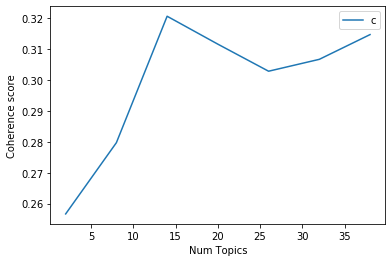

In [376]:
# Show graph
%matplotlib inline
import matplotlib.pyplot as plt

limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.savefig('Coherenece Amazon4.png')
plt.show()


## Stretch Goals

* Incorporate Named Entity Recognition in your analysis
* Incorporate some custom pre-processing from our previous lessons (like spacy lemmatization)
* Analyze a dataset of interest to you with topic modeling